In [1]:
!pip install tensorflow pillow matplotlib scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
# Define list of words (you can expand it)
words_list =[
    'cat', 'dog', 'car', 'tree', 'book', 'pen', 'house', 'apple', 'ball', 'chair',
    'phone', 'laptop', 'table', 'bottle', 'cup', 'shoe', 'bag', 'bicycle', 'watch', 'hat'
]

# Create folders
os.makedirs('datasets/images_1', exist_ok=True)

# Create images
def create_image(word, font_size=32):
    img = Image.new('L', (100, 30), color=255)  
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except:
        font = ImageFont.load_default()
    draw.text((5, 5), word, fill=0, font=font)
    return img

# Save images
image_paths = []
labels = []

for word in words_list:
    for i in range(400): 
        img = create_image(word, font_size=random.randint(20, 32))
        img_path = f'datasets/images_1/{word}_{i}.png'
        img.save(img_path)
        image_paths.append(img_path)
        labels.append(word)

print(f"Generated {len(image_paths)} images.")


Generated 8000 images.


In [5]:
import os
print(os.getcwd())


C:\Users\Sanjay Mali\Data_science_pratice_projects\Projects_Data_Science


In [6]:

X = []
y = []

for img_path, label in zip(image_paths, labels):
    img = Image.open(img_path).resize((100, 30))
    img_array = np.array(img)
    X.append(img_array)
    y.append(words_list.index(label))  

X = np.array(X)
X = X.reshape(-1, 30, 100, 1) / 255.0 
y = np.array(y)
y = to_categorical(y, num_classes=len(words_list))  #

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (8000, 30, 100, 1)
y shape: (8000, 20)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 6400
Testing samples: 1600


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(30, 100, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(words_list), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Sanjay Mali\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8832)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,130,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,152,020 (4.39 MB)

 Trainable params: 1,152,020 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.2782 - loss: 2.3083 - val_accuracy: 0.9962 - val_loss: 0.0680
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9506 - loss: 0.1691 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9766 - loss: 0.0763 - val_accuracy: 1.0000 - val_loss: 9.0280e-04
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9828 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 4.9575e-04
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9849 - loss: 0.0508 - val_accuracy: 1.0000 - val_loss: 9.7672e-04
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9909 - loss: 0.0318 - val_accuracy: 1.0000 - val_loss: 5.8424e-04
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 1.0000 - val_loss: 7.0941e-06
Epoch 8/15
 75/200 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9841 - 

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 8.5743e-04
Test Accuracy: 1.0000


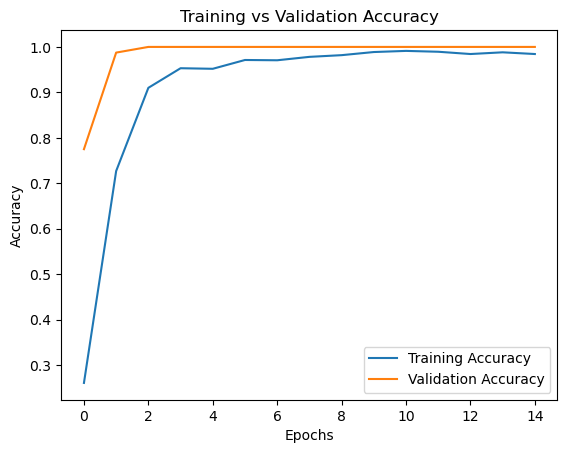

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


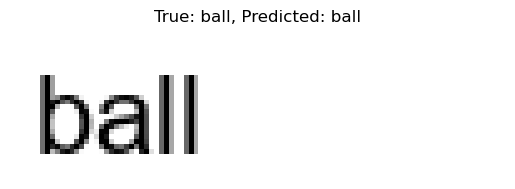

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


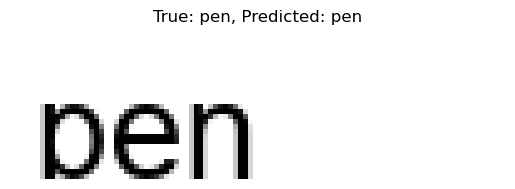

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


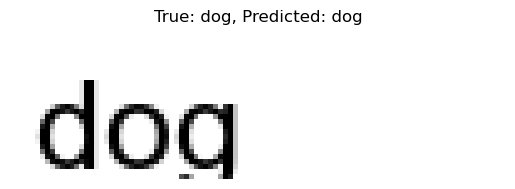

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


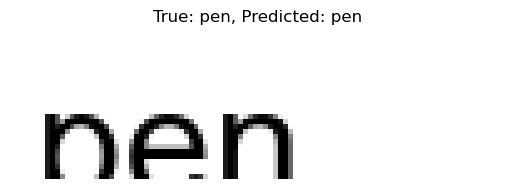

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


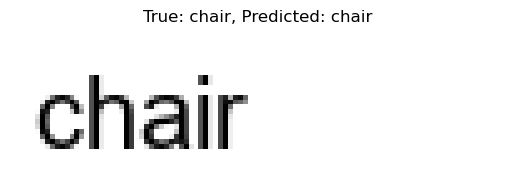

In [17]:
# Predict a few samples
n = 5
sample_indexes = np.random.choice(X_test.shape[0], n)

for idx in sample_indexes:
    img = X_test[idx]
    true_label = np.argmax(y_test[idx])
    pred_label = np.argmax(model.predict(img.reshape(1,30,100,1)))
    
    plt.imshow(img.reshape(30,100), cmap='gray')
    plt.title(f"True: {words_list[true_label]}, Predicted: {words_list[pred_label]}")
    plt.axis('off')
    plt.show()
